### 1.函数载入

In [1]:
import sys 
print(sys.version)

3.11.10 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 07:22:26) [MSC v.1929 64 bit (AMD64)]


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import pickle
import numpy as np
import pickle
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.linear_model import LogisticRegression as lr
from sklearn.svm import SVC as sv
#from sklearn.svm import LinearSVC as sv
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from yellowbrick.classifier import (
    ConfusionMatrix,
)
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import (
    ClassificationReport,
)
from yellowbrick.classifier import ROCAUC

import numpy
import pandas

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


import seaborn as sns
from pickle import dump
from pickle import load

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

### 2.数据载入

In [11]:
path='pre.csv'

In [12]:
data = pd.read_csv(path)

In [13]:
data.head()

sex  age    BMI  urate    BG  ApoA  ApoB  lipoprotein  CHOL    TG  ...  \
0    1   17  20.45  399.0  4.95  1.21  0.44        134.0  2.58  0.47  ...   
1    1   36  23.04  249.0  4.28  1.44  1.08        134.0  5.02  0.95  ...   
2    1   55  22.34  328.0  3.46  1.34  0.45        134.0  2.30  1.70  ...   
3    0   55  20.89  197.0  3.05  1.64  1.15        134.0  5.88  1.69  ...   
4    1   54  22.04  280.0  5.61  1.61  1.05        134.0  5.06  0.70  ...   

   Hyperglycemia  Hyperuricemia  Meniscal_tear_injury  \
0              0              0                     0   
1              0              0                     1   
2              1              0                     0   
3              0              0                     0   
4              0              0                     0   

   Cruciate_Ligament_Injury  Osteoarthritis  Osteoporosis  surgical_time  \
0                         0               0             0              2   
1                         1               0             0              2   
2                         0               0             0              3   
3                         0               0             0              3   
4                         0               1             0              1   

   Carprini  Anticoagulant  Postoperative_ultrasound  
0         1              1                         0  
1         2              1                         0  
2         2              1                         1  
3         2              1                         0  
4         1              1                         0  

[5 rows x 25 columns]

In [14]:
data.columns

Index(['sex', 'age', 'BMI', 'urate', 'BG', 'ApoA', 'ApoB', 'lipoprotein',
       'CHOL', 'TG', 'HDL', 'LDL', 'Preoperative_ultrasound', 'Hypertension',
       'Hyperlipidemia', 'Hyperglycemia', 'Hyperuricemia',
       'Meniscal_tear_injury', 'Cruciate_Ligament_Injury', 'Osteoarthritis',
       'Osteoporosis', 'surgical_time', 'Carprini', 'Anticoagulant',
       'Postoperative_ultrasound'],
      dtype='object')

In [15]:
data.dtypes

sex                           int64
age                           int64
BMI                         float64
urate                       float64
BG                          float64
ApoA                        float64
ApoB                        float64
lipoprotein                 float64
CHOL                        float64
TG                          float64
HDL                         float64
LDL                         float64
Preoperative_ultrasound       int64
Hypertension                  int64
Hyperlipidemia                int64
Hyperglycemia                 int64
Hyperuricemia                 int64
Meniscal_tear_injury          int64
Cruciate_Ligament_Injury      int64
Osteoarthritis                int64
Osteoporosis                  int64
surgical_time                 int64
Carprini                      int64
Anticoagulant                 int64
Postoperative_ultrasound      int64
dtype: object

In [16]:
data.shape

(378, 25)

In [17]:
class_counts = data.groupby('Postoperative_ultrasound').size()
print(class_counts)

Postoperative_ultrasound
0    313
1     65
dtype: int64


In [19]:
data.isnull().sum()

sex                         0
age                         0
BMI                         0
urate                       0
BG                          0
ApoA                        0
ApoB                        0
lipoprotein                 0
CHOL                        0
TG                          0
HDL                         0
LDL                         0
Preoperative_ultrasound     0
Hypertension                0
Hyperlipidemia              0
Hyperglycemia               0
Hyperuricemia               0
Meniscal_tear_injury        0
Cruciate_Ligament_Injury    0
Osteoarthritis              0
Osteoporosis                0
surgical_time               0
Carprini                    0
Anticoagulant               0
Postoperative_ultrasound    0
dtype: int64

### 3.数据预处理

#### 3.1.基本特征数据准备

In [20]:
dataset = data.values
X_train = dataset[:,:-1]
column = data.columns[:-1]
rownames = data.index
X = pd.DataFrame(X_train, columns=column,index=rownames)

In [21]:
X.head()

sex   age    BMI  urate    BG  ApoA  ApoB  lipoprotein  CHOL    TG  ...  \
0  1.0  17.0  20.45  399.0  4.95  1.21  0.44        134.0  2.58  0.47  ...   
1  1.0  36.0  23.04  249.0  4.28  1.44  1.08        134.0  5.02  0.95  ...   
2  1.0  55.0  22.34  328.0  3.46  1.34  0.45        134.0  2.30  1.70  ...   
3  0.0  55.0  20.89  197.0  3.05  1.64  1.15        134.0  5.88  1.69  ...   
4  1.0  54.0  22.04  280.0  5.61  1.61  1.05        134.0  5.06  0.70  ...   

   Hyperlipidemia  Hyperglycemia  Hyperuricemia  Meniscal_tear_injury  \
0             0.0            0.0            0.0                   0.0   
1             0.0            0.0            0.0                   1.0   
2             0.0            1.0            0.0                   0.0   
3             0.0            0.0            0.0                   0.0   
4             0.0            0.0            0.0                   0.0   

   Cruciate_Ligament_Injury  Osteoarthritis  Osteoporosis  surgical_time  \
0                       0.0             0.0           0.0            2.0   
1                       1.0             0.0           0.0            2.0   
2                       0.0             0.0           0.0            3.0   
3                       0.0             0.0           0.0            3.0   
4                       0.0             1.0           0.0            1.0   

   Carprini  Anticoagulant  
0       1.0            1.0  
1       2.0            1.0  
2       2.0            1.0  
3       2.0            1.0  
4       1.0            1.0  

[5 rows x 24 columns]

In [22]:
y_train = dataset[:,-1]
y_column = data.columns[-1]
y = pd.DataFrame(y_train,index=rownames,columns=[y_column])

In [23]:
y.head()

Postoperative_ultrasound
0                       0.0
1                       0.0
2                       1.0
3                       0.0
4                       0.0

In [26]:
X.head()

sex   age    BMI  urate    BG  ApoA  ApoB  lipoprotein  CHOL    TG  ...  \
0  1.0  17.0  20.45  399.0  4.95  1.21  0.44        134.0  2.58  0.47  ...   
1  1.0  36.0  23.04  249.0  4.28  1.44  1.08        134.0  5.02  0.95  ...   
2  1.0  55.0  22.34  328.0  3.46  1.34  0.45        134.0  2.30  1.70  ...   
3  0.0  55.0  20.89  197.0  3.05  1.64  1.15        134.0  5.88  1.69  ...   
4  1.0  54.0  22.04  280.0  5.61  1.61  1.05        134.0  5.06  0.70  ...   

   Hyperlipidemia  Hyperglycemia  Hyperuricemia  Meniscal_tear_injury  \
0             0.0            0.0            0.0                   0.0   
1             0.0            0.0            0.0                   1.0   
2             0.0            1.0            0.0                   0.0   
3             0.0            0.0            0.0                   0.0   
4             0.0            0.0            0.0                   0.0   

   Cruciate_Ligament_Injury  Osteoarthritis  Osteoporosis  surgical_time  \
0                       0.0             0.0           0.0            2.0   
1                       1.0             0.0           0.0            2.0   
2                       0.0             0.0           0.0            3.0   
3                       0.0             0.0           0.0            3.0   
4                       0.0             1.0           0.0            1.0   

   Carprini  Anticoagulant  
0       1.0            1.0  
1       2.0            1.0  
2       2.0            1.0  
3       2.0            1.0  
4       1.0            1.0  

[5 rows x 24 columns]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [28]:
X_train_std = X_train
X_test_std = X_test

> 数据监测

##### KS检验（Kolmogorov-Smirnov）——————KS检验是基于累计分布函数，用于检验一个分布是否符合某种理论分布或比较两个经验分布是否有显著差异。两样本K-S检验由于对两样本的经验分布函数的位置和形状参数的差异都敏感，所以成为比较两样本的最有用且最常用的非参数方法之一
##### ks检验一般返回两个值：第一个值表示两个分布之间的最大距离，值越小即这两个分布的差距越小，分布也就越一致。第二个值是p值，用来判定假设检验结果的一个参数，p值越大，越不能拒绝原假设（待检验的两个分布式同分布），即两个分布越是同分布

In [16]:
from scipy.stats import ks_2samp
def KS(train,test):
    statistics,p_val = ks_2samp(train,test)
    return statistics,p_val

In [17]:
number = []
p_val = []
for i in range(X_train_std.shape[1]-1):
    statistics1,p_val1 = KS(X_train_std.iloc[:,i],X_test_std.iloc[:,i])
    if p_val1<0.05:
        p_val.append(p_val1)
        number.append(i)

In [20]:
p_val

[]

### 4.模型训练

#### 4.1.评估算法:基础

##### 此处我们使用三种模型（随机森林、XGBoot，adaboost）进行模型构建，并且重复十倍交叉实验10次，求得平均的结果

In [29]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('BGM', BaggingClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBDT', GradientBoostingClassifier()))
models.append(('CatBoost', CatBoostClassifier()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    pipeline = Pipeline(steps=[('model', model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=7)
    # evaluate model
    scores = cross_val_score(pipeline, X_train_std, y_train, scoring='accuracy', cv=cv, n_jobs=1)
    results.append(scores)
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(scores), np.std(scores)))

LR: 0.830108 (0.048925)
RF: 0.832484 (0.035129)
NB: 0.779462 (0.087192)
BGM: 0.814452 (0.046357)
XGB: 0.804559 (0.048930)
ABC: 0.810634 (0.053370)
GBDT: 0.802656 (0.056285)
Learning rate set to 0.005899
0:	learn: 0.6891098	total: 146ms	remaining: 2m 26s
1:	learn: 0.6847594	total: 151ms	remaining: 1m 15s
2:	learn: 0.6803486	total: 155ms	remaining: 51.5s
3:	learn: 0.6764696	total: 159ms	remaining: 39.5s
4:	learn: 0.6727970	total: 162ms	remaining: 32.2s
5:	learn: 0.6690023	total: 164ms	remaining: 27.2s
6:	learn: 0.6647590	total: 167ms	remaining: 23.7s
7:	learn: 0.6609184	total: 169ms	remaining: 20.9s
8:	learn: 0.6562584	total: 171ms	remaining: 18.8s
9:	learn: 0.6521896	total: 172ms	remaining: 17.1s
10:	learn: 0.6485377	total: 174ms	remaining: 15.6s
11:	learn: 0.6442761	total: 175ms	remaining: 14.4s
12:	learn: 0.6407195	total: 176ms	remaining: 13.4s
13:	learn: 0.6377813	total: 177ms	remaining: 12.5s
14:	learn: 0.6347470	total: 178ms	remaining: 11.7s
15:	learn: 0.6308777	total: 179ms	remain

In [30]:
for i in range(0,8):
    print("%s: %f (%f)" % (names[i], np.mean(results[i]), np.std(results[i])))

LR: 0.830108 (0.048925)
RF: 0.832484 (0.035129)
NB: 0.779462 (0.087192)
BGM: 0.814452 (0.046357)
XGB: 0.804559 (0.048930)
ABC: 0.810634 (0.053370)
GBDT: 0.802656 (0.056285)
CatBoost: 0.829140 (0.034669)


In [31]:
results_10fold = {'Model': names, '10-fold CV accuracy': [f"{np.mean(r):.3f} ({np.std(r):.3f})" for r in results]}
results_10fold = pd.DataFrame(results_10fold)
results_10fold

Model 10-fold CV accuracy
0        LR       0.830 (0.049)
1        RF       0.832 (0.035)
2        NB       0.779 (0.087)
3       BGM       0.814 (0.046)
4       XGB       0.805 (0.049)
5       ABC       0.811 (0.053)
6      GBDT       0.803 (0.056)
7  CatBoost       0.829 (0.035)

In [30]:
file_path = '10-fold CV accuracy.xlsx'
results_10fold.to_excel(file_path, index=True)

In [32]:
x = pd.DataFrame(results,index=['LR','RF','NB','BGM','XGBoost','AdaBoost','GBDT','CatBoost'])

In [33]:
x

0         1         2         3         4         5   \
LR        0.806452  0.838710  0.866667  0.800000  0.800000  0.800000   
RF        0.870968  0.806452  0.900000  0.866667  0.833333  0.833333   
NB        0.903226  0.806452  0.733333  0.800000  0.866667  0.766667   
BGM       0.903226  0.774194  0.766667  0.866667  0.800000  0.800000   
XGBoost   0.774194  0.774194  0.866667  0.800000  0.800000  0.800000   
AdaBoost  0.838710  0.870968  0.866667  0.833333  0.800000  0.800000   
GBDT      0.838710  0.741935  0.766667  0.800000  0.800000  0.833333   
CatBoost  0.838710  0.838710  0.900000  0.866667  0.833333  0.833333   

                6         7         8         9   ...        90        91  \
LR        0.766667  0.800000  0.900000  0.900000  ...  0.870968  0.838710   
RF        0.833333  0.833333  0.866667  0.833333  ...  0.806452  0.838710   
NB        0.566667  0.800000  0.633333  0.866667  ...  0.806452  0.774194   
BGM       0.700000  0.766667  0.800000  0.900000  ...  0.870968  0.806452   
XGBoost   0.700000  0.866667  0.800000  0.833333  ...  0.838710  0.806452   
AdaBoost  0.700000  0.733333  0.833333  0.833333  ...  0.838710  0.774194   
GBDT      0.666667  0.766667  0.866667  0.900000  ...  0.838710  0.806452   
CatBoost  0.766667  0.800000  0.833333  0.833333  ...  0.806452  0.838710   

                92        93        94        95        96        97  \
LR        0.833333  0.933333  0.766667  0.866667  0.800000  0.833333   
RF        0.833333  0.866667  0.833333  0.833333  0.833333  0.833333   
NB        0.800000  0.833333  0.733333  0.866667  0.633333  0.800000   
BGM       0.833333  0.833333  0.766667  0.866667  0.833333  0.833333   
XGBoost   0.866667  0.733333  0.766667  0.833333  0.833333  0.800000   
AdaBoost  0.766667  0.766667  0.800000  0.833333  0.833333  0.833333   
GBDT      0.833333  0.766667  0.800000  0.833333  0.766667  0.733333   
CatBoost  0.866667  0.866667  0.833333  0.866667  0.800000  0.833333   

                98        99  
LR        0.833333  0.766667  
RF        0.866667  0.766667  
NB        0.866667  0.700000  
BGM       0.866667  0.766667  
XGBoost   0.833333  0.766667  
AdaBoost  0.866667  0.766667  
GBDT      0.866667  0.733333  
CatBoost  0.833333  0.766667  

[8 rows x 100 columns]

In [33]:
x.to_csv('origin_model.csv', index=True)

In [34]:
names=['LR','RF','NB','BGM','XGBoost','AdaBoost','GBDT','CatBoost']

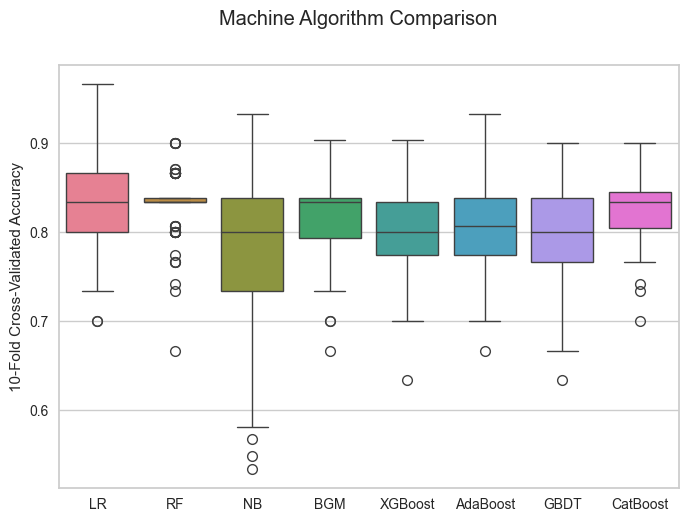

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Machine Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(results,)
ax.set_xticklabels(names)
ax.set_ylabel('10-Fold Cross-Validated Accuracy')
plt.savefig("Figure1.tiff",dpi=600,pil_kwargs={"compression": "tiff_lzw"},bbox_inches='tight')

Learning rate set to 0.006179
0:	learn: 0.6889235	total: 2.56ms	remaining: 2.56s
1:	learn: 0.6847130	total: 4.85ms	remaining: 2.42s
2:	learn: 0.6795481	total: 7.82ms	remaining: 2.6s
3:	learn: 0.6754627	total: 11.2ms	remaining: 2.78s
4:	learn: 0.6718527	total: 14.4ms	remaining: 2.87s
5:	learn: 0.6675437	total: 17.4ms	remaining: 2.88s
6:	learn: 0.6628733	total: 19.7ms	remaining: 2.8s
7:	learn: 0.6589787	total: 22.2ms	remaining: 2.75s
8:	learn: 0.6541695	total: 24.4ms	remaining: 2.69s
9:	learn: 0.6500596	total: 26.2ms	remaining: 2.59s
10:	learn: 0.6460904	total: 28ms	remaining: 2.52s
11:	learn: 0.6415822	total: 29.5ms	remaining: 2.43s
12:	learn: 0.6379857	total: 31ms	remaining: 2.35s
13:	learn: 0.6343184	total: 32.1ms	remaining: 2.26s
14:	learn: 0.6307862	total: 33.3ms	remaining: 2.19s
15:	learn: 0.6257674	total: 34.4ms	remaining: 2.12s
16:	learn: 0.6214771	total: 35.7ms	remaining: 2.07s
17:	learn: 0.6183123	total: 37.3ms	remaining: 2.03s
18:	learn: 0.6152313	total: 38.5ms	remaining: 1.99

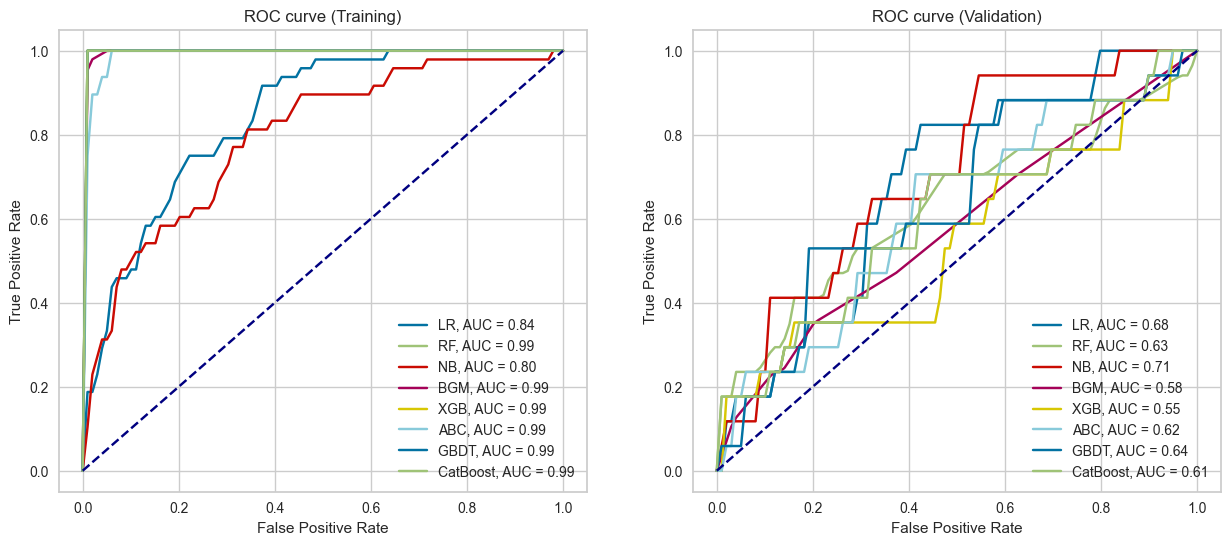

In [45]:

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
mean_fpr = np.linspace(0, 1, 100)
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('BGM', BaggingClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBDT', GradientBoostingClassifier()))
models.append(('CatBoost', CatBoostClassifier()))

# create empty lists to store results
train_auc_list = []
test_auc_list = []

# evaluate each model in turn
results = []
names = []
# 计算和绘制训练集的ROC曲线
ax1.set_title('ROC curve (Training)')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
for name, model in models:
    pipeline = Pipeline(steps=[('model', model)])
    pipeline.fit(X_train_std, y_train)
    
    # 预测概率
    y_train_pred_prob = pipeline.predict_proba(X_train_std)[:, 1]
    
    # 计算ROC曲线数据
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
    
    # 对ROC曲线数据进行插值
    interp_tpr_train = interp(mean_fpr, fpr_train, tpr_train)
    interp_tpr_train[0] = 0.0
    
    # 计算AUC
    auc_train = auc(mean_fpr, interp_tpr_train)
    train_auc_list.append(auc_train)
    # 绘制平滑后的ROC曲线
    ax1.plot(mean_fpr, interp_tpr_train, label=f'{name}, AUC = {auc_train:.2f}')
    
# 添加随机猜测线
ax1.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax1.legend(loc='lower right')

# 计算和绘制测试集的ROC曲线
ax2.set_title('ROC curve (Validation)')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
for name, model in models:
    pipeline = Pipeline(steps=[('model', model)])
    pipeline.fit(X_train_std, y_train)
    
    # 预测概率
    y_test_pred_prob = pipeline.predict_proba(X_test_std)[:, 1]
    
    # 计算ROC曲线数据
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
    
    # 对ROC曲线数据进行插值
    interp_tpr_test = interp(mean_fpr, fpr_test, tpr_test)
    interp_tpr_test[0] = 0.0
    
    # 计算AUC
    auc_test = auc(mean_fpr, interp_tpr_test)
    test_auc_list.append(auc_test)
    # 绘制平滑后的ROC曲线
    ax2.plot(mean_fpr, interp_tpr_test, label=f'{name}, AUC = {auc_test:.2f}')
    
# 添加随机猜测线
ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax2.legend(loc='lower right')



In [46]:
# 调整子图间的间距
plt.tight_layout()

# 显示图表
plt.show()

<Figure size 800x550 with 0 Axes>

In [42]:
plt.savefig("model comparison ROC.tiff",dpi=600,pil_kwargs={"compression": "tiff_lzw"},bbox_inches='tight')

<Figure size 800x550 with 0 Axes>

In [41]:
# create a pandas DataFrame to store results
results_df = pd.DataFrame({'Model': [name for name, _ in models],
                           'AUC Train': train_auc_list,
                           'AUC Test': test_auc_list})

# format the columns
results_df['AUC Training'] = results_df['AUC Train'].apply(lambda x: f'{x:.3f}')
results_df['AUC Validation'] = results_df['AUC Test'].apply(lambda x: f'{x:.3f}')

# set Model column as index
results_df.set_index('Model', inplace=True)

# display table
print(results_df)


         AUC Train AUC Test
Model                      
LR           0.844    0.684
RF           0.995    0.618
NB           0.796    0.707
BGM          0.995    0.599
XGB          0.995    0.546
ABC          0.989    0.619
GBDT         0.995    0.643
CatBoost     0.995    0.610


In [42]:
# 筛选指定列
selected_cols = ['AUC Train', 'AUC Test']
results_df = results_df[selected_cols]

# 将结果保存为Excel文件
file_path = 'ROC values.xlsx'
results_df.to_excel(file_path, index=True)